In [1]:
!pip install scikit-learn seaborn matplotlib pandas joblib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\palak\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Project Introduction & Data Context

### Project Statement:
High cart abandonment rates on the e-commerce platform result in lost sales and reduced customer lifetime value.

### Business Problem:
In the competitive world of e-commerce, a significant number of users abandon their shopping carts before completing purchases.
This cart abandonment results in substantial revenue loss and decreased customer lifetime value.

### Project Objective:
This project aims to analyze user session behavior and build machine learning models to:
Identify patterns contributing to cart abandonment
Predict which sessions are likely to result in abandonment
Enable personalized marketing and retention strategies

### Dataset Overview:
The dataset contains anonymized session-level data from an e-commerce platform.

### Feature Description:
session_id: Unique session identifier
pages_visited: Total number of pages viewed in the session
time_on_site: Time spent on the website (in seconds)
cart_value: Total value of items added to cart
abandoned: Target variable (1 = abandoned, 0 = purchased)

In [2]:
# Load and preview the dataset
import pandas as pd

df = pd.read_csv("shopping_abandonment.csv")
df.head()

,session_id,pages_visited,time_on_site,cart_value,abandoned
0,SID1,8,548,23.49,0
1,SID2,13,226,112.20,0
2,SID3,18,472,214.70,1
3,SID4,13,529,294.08,0
4,SID5,9,936,293.16,1


##  Data Cleaning & Preprocessing

In [3]:
# Missing values check
print("Missing values:\n", df.isnull().sum())

# Data types and descriptive stats
print("\nData types and basic statistics:")
df.info()
print(df.describe())

# Duplicate session_id check
duplicates = df['session_id'].duplicated().sum()
print(f"\nDuplicate session_id entries: {duplicates}")

# Outlier Detection using IQR method
numerical_cols = ['pages_visited', 'time_on_site', 'cart_value']
print("\nOutlier detection:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} potential outliers")

Missing values:
 session_id       0
pages_visited    0
time_on_site     0
cart_value       0
abandoned        0
dtype: int64

Data types and basic statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   session_id     1000 non-null   object 
 1   pages_visited  1000 non-null   int64  
 2   time_on_site   1000 non-null   int64  
 3   cart_value     1000 non-null   float64
 4   abandoned      1000 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 39.2+ KB
       pages_visited  time_on_site  cart_value    abandoned
count    1000.000000   1000.000000  1000.00000  1000.000000
mean       10.276000    518.687000   153.67911     0.310000
std         5.438695    282.808181    86.05114     0.462725
min         1.000000     34.000000    10.29000     0.000000
25%         6.000000    262.750000    73.53000     0.000000
50%  

## Exploratory Data Analysis (EDA)

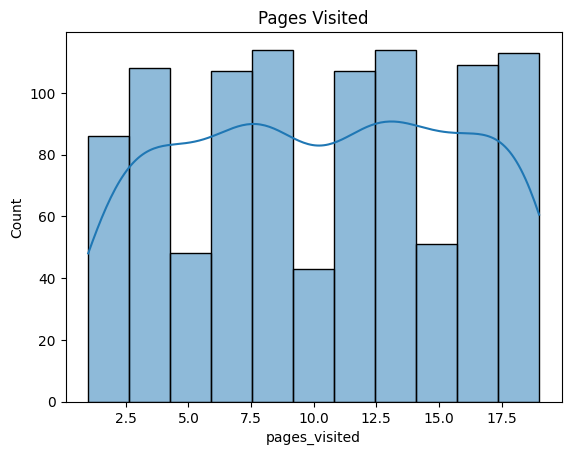

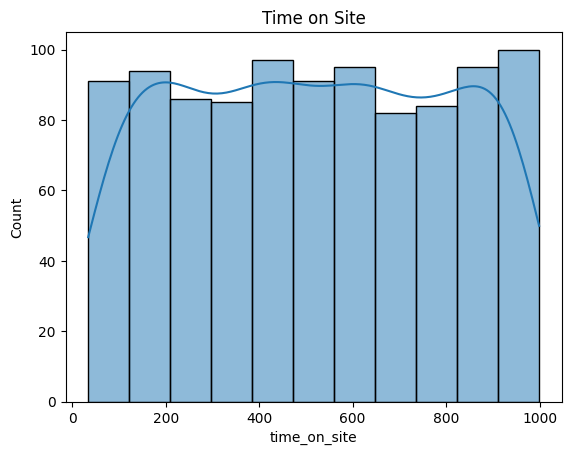

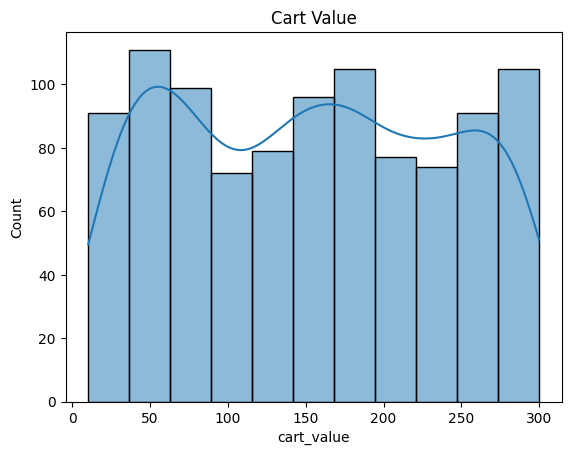

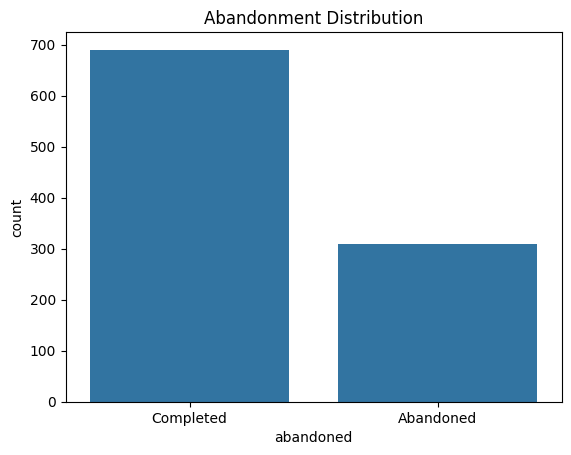

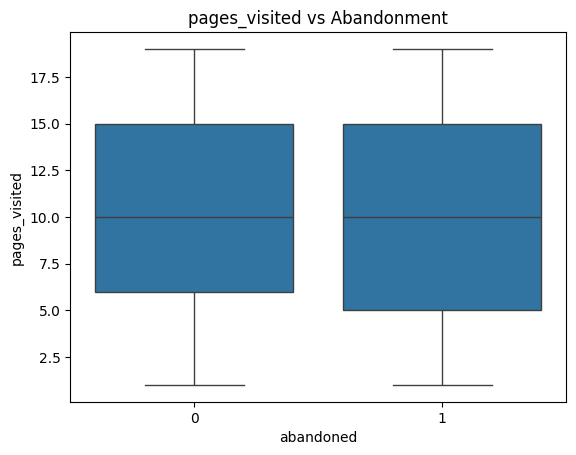

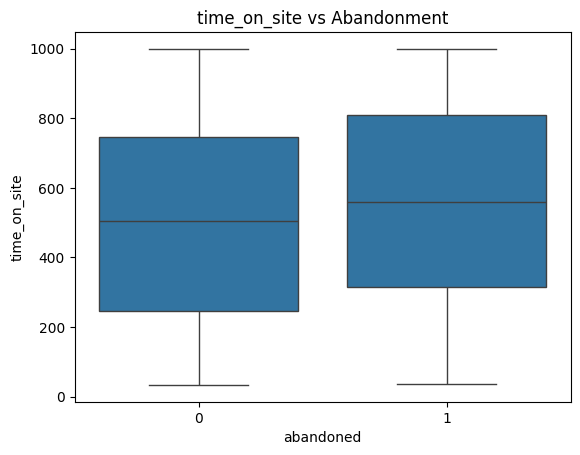

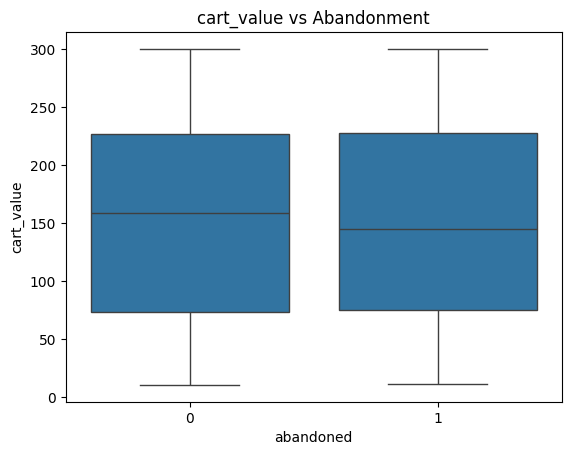

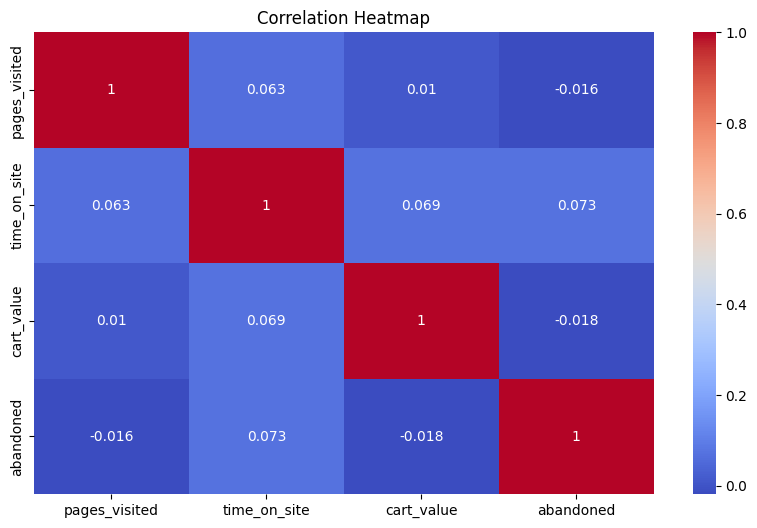

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plots
sns.histplot(data=df, x='pages_visited', kde=True)
plt.title('Pages Visited')
plt.show()

sns.histplot(data=df, x='time_on_site', kde=True)
plt.title('Time on Site')
plt.show()

sns.histplot(data=df, x='cart_value', kde=True)
plt.title('Cart Value')
plt.show()

# Target class distribution
sns.countplot(data=df, x='abandoned')
plt.title('Abandonment Distribution')
plt.xticks([0, 1], ['Completed', 'Abandoned'])
plt.show()

# Boxplots to compare behavior by abandonment
for col in ['pages_visited', 'time_on_site', 'cart_value']:
    sns.boxplot(data=df, x='abandoned', y=col)
    plt.title(f'{col} vs Abandonment')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Model Development

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Features and target
X = df[['pages_visited', 'time_on_site', 'cart_value']]
y = df['abandoned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Logistic Regression with class weight
log_model = LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Results")
print(classification_report(y_test, y_pred_log))

# Random Forest with class weight
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.72      0.50      0.59       138
           1       0.34      0.56      0.42        62

    accuracy                           0.52       200
   macro avg       0.53      0.53      0.51       200
weighted avg       0.60      0.52      0.54       200

Random Forest Results
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       138
           1       0.23      0.08      0.12        62

    accuracy                           0.63       200
   macro avg       0.45      0.48      0.44       200
weighted avg       0.54      0.63      0.57       200



## Model Evaluation & Tuning

Logistic Regression CV Accuracy: 0.5310
Random Forest CV Accuracy: 0.6510


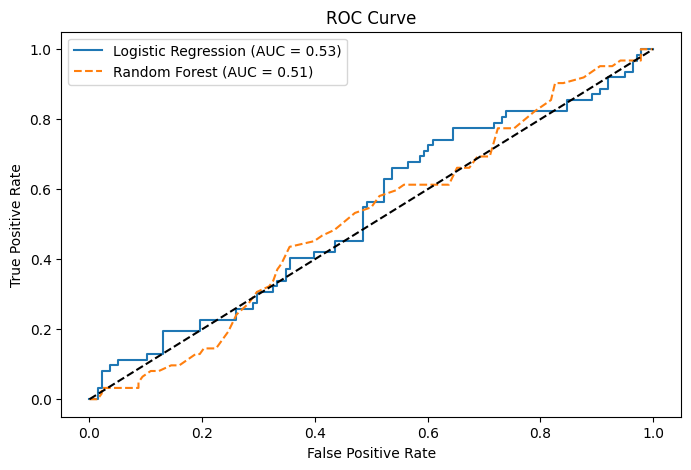

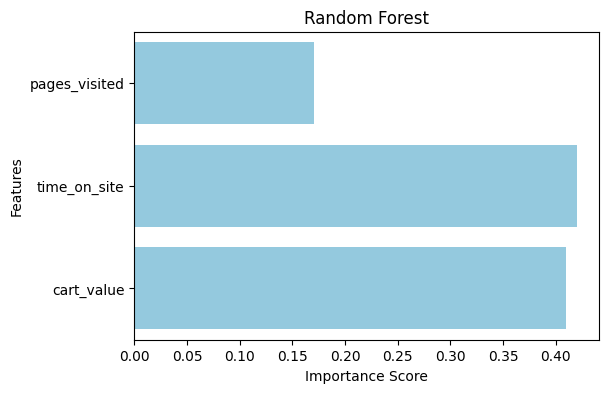

In [6]:

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc

# Cross-validation scores
print(f"Logistic Regression CV Accuracy: {cross_val_score(log_model, X, y, cv=5).mean():.4f}")
print(f"Random Forest CV Accuracy: {cross_val_score(rf_model, X, y, cv=5).mean():.4f}")

# Grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Probability scores for ROC
y_prob_log = log_model.predict_proba(X_test)[:, 1]
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# ROC values
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# AUC Scores
auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC
plt.figure(figsize=(8, 5))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", linestyle='--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature importances
importances = best_rf.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=feature_names, color='skyblue')
plt.title("Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [ ]:
import joblib

# Save the best-performing model (Random Forest)
joblib.dump(rf_model, 'final_model.pkl')

print("Model saved as final_model.pkl")


Model saved as final_model.pkl


## Unsupervised Learning (Clustering & PCA)

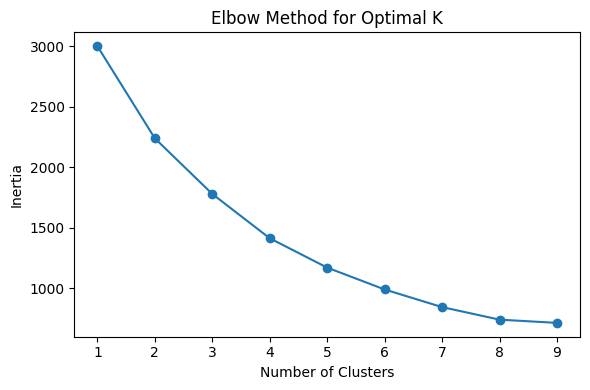

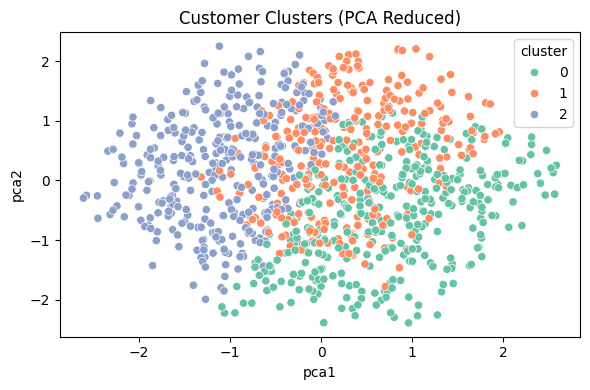

Cluster Summary:

         abandoned  pages_visited  time_on_site  cart_value
cluster                                                    
0         0.292225      11.217158    557.243968  242.935576
1         0.329897      10.518900    777.745704   98.471546
2         0.312500       9.020833    251.520833  102.407500

Cluster Sizes:

cluster
0    373
2    336
1    291
Name: count, dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select behavioral features
X_cluster = df[['pages_visited', 'time_on_site', 'cart_value']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Elbow method for optimal k
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.tight_layout()
plt.show()

# Fit KMeans with optimal k (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title("Customer Clusters (PCA Reduced)")
plt.tight_layout()
plt.show()

# Analyze cluster behavior vs abandonment
cluster_summary = df.groupby('cluster')[['abandoned', 'pages_visited', 'time_on_site', 'cart_value']].mean()
cluster_counts = df['cluster'].value_counts()

print("Cluster Summary:\n")
print(cluster_summary)
print("\nCluster Sizes:\n")
print(cluster_counts)
